Esse projeto tem como objetivo fazer um estudo de um dataset sobre bike sharing
e tentar criar um modelo que ajude a prever o número total de bicicletas que serão
alugadas a cada hora. O dataset se encontra no link:
● https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

1)A)

In [75]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt


In [76]:
df = pd.read_csv('hour.csv')

In [77]:
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


1)B)

Vamos fazer um histograma da variavel resposta (total de aluguel)

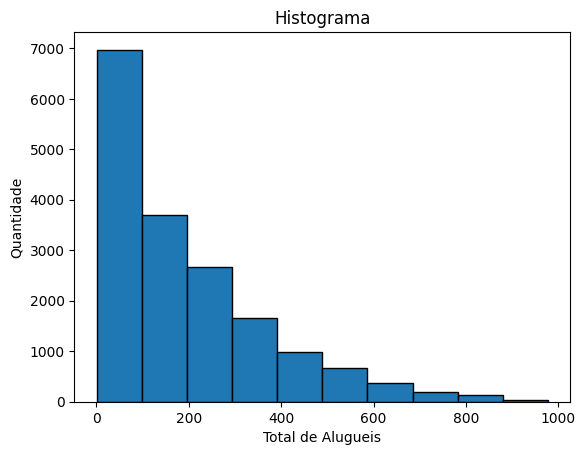

In [78]:
total_aluguel = df['cnt']

# Criar o histograma
plt.hist(total_aluguel, bins=10, edgecolor='black')

# Definir rótulos e título
plt.xlabel('Total de Alugueis')
plt.ylabel('Quantidade')
plt.title('Histograma')

# Exibir o histograma
plt.show()

Dado que a temp é dada por (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39
podemos obter a temperatura em graus celcius usando a formula:
temperatura = temp * (t_max - t_min) + t_min


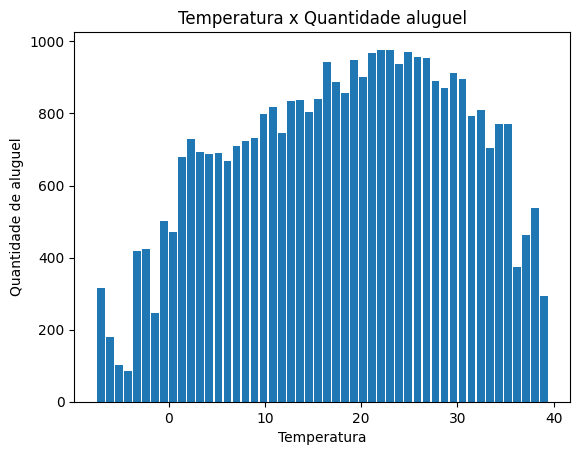

In [79]:
temp = df['temp']

t_min = -8
t_max = 39

temperatura = temp * (t_max - t_min) + t_min

plt.bar(temperatura, total_aluguel)

plt.xlabel('Temperatura')
plt.ylabel('Quantidade de aluguel')
plt.title('Temperatura x Quantidade aluguel')

plt.show()

2)
A) As colunas explicativas são:
season,	yr,	mnth,	hr,	holiday, weekday,	workingday,	weathersit,	temp,	atemp, hum e windspeed.

B) Variavies futuras: São as variaveis casual e registered.

C) Os metadados são informações sobre os dados que nos ajudam a entender seu significado e contexto, logo são metadados:
instant e dteday


3)A)

In [80]:
# Converter a coluna de datas para o tipo datetime
df['dteday'] = pd.to_datetime(df['dteday'])


# a base de treino sera de 2011
# Filtrar as linhas correspondentes a 2011
df_treino = df[df['dteday'].dt.year == 2011]



# a base de teste sera de 2012
# Filtrar as linhas correspondentes a 2012
df_teste = df[df['dteday'].dt.year == 2012]

In [81]:
# vamos remover os metadados dos dataframes
metadado = ['instant', 'dteday']
df = df.drop(labels=metadado, axis=1)
df_treino = df_treino.drop(labels=metadado, axis=1)
df_teste = df_teste.drop(labels=metadado, axis=1)


3)B)

In [82]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

var_qualitativas = ['season','holiday','weekday','workingday','weathersit']

one_hot_enc = make_column_transformer(
    (OneHotEncoder(handle_unknown = 'ignore'), var_qualitativas),
    remainder='passthrough')

df = one_hot_enc.fit_transform(df)
df = pd.DataFrame(df, columns=one_hot_enc.get_feature_names_out())
df

,onehotencoder__season_1,onehotencoder__season_2,onehotencoder__season_3,onehotencoder__season_4,onehotencoder__holiday_0,onehotencoder__holiday_1,onehotencoder__weekday_0,onehotencoder__weekday_1,onehotencoder__weekday_2,onehotencoder__weekday_3,...,remainder__yr,remainder__mnth,remainder__hr,remainder__temp,remainder__atemp,remainder__hum,remainder__windspeed,remainder__casual,remainder__registered,remainder__cnt
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.24,0.2879,0.81,0.0000,3.0,13.0,16.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.22,0.2727,0.80,0.0000,8.0,32.0,40.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,2.0,0.22,0.2727,0.80,0.0000,5.0,27.0,32.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,3.0,0.24,0.2879,0.75,0.0000,3.0,10.0,13.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,4.0,0.24,0.2879,0.75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,12.0,19.0,0.26,0.2576,0.60,0.1642,11.0,108.0,119.0
17375,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,12.0,20.0,0.26,0.2576,0.60,0.1642,8.0,81.0,89.0
17376,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,12.0,21.0,0.26,0.2576,0.60,0.1642,7.0,83.0,90.0
17377,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,12.0,22.0,0.26,0.2727,0.56,0.1343,13.0,48.0,61.0


Como precisamos computar o valor do MAE, vamos usar o MLPregressor da sklearn

4)

In [83]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error


In [88]:
# Separar as variáveis explicativas (X) e a variável resposta/futura (y) nos dados de treino e teste
variavies_futuras_resposta = ['casual', 'registered', 'cnt']
X_treino = df_treino.drop(labels=variavies_futuras_resposta, axis=1)
y_treino = df_treino[variavies_futuras_resposta]

X_teste = df_teste.drop(labels=variavies_futuras_resposta, axis=1)
y_teste = df_teste[variavies_futuras_resposta]

In [89]:
# Modelo sem camadas intermediárias
modelo_sem_camadas = MLPRegressor(random_state=42)
modelo_sem_camadas.fit(X_treino, y_treino)
predicoes_sem_camada = modelo_sem_camadas.predict(X_teste)
mae_sem_camadas = mean_absolute_error(y_teste, predicoes_sem_camada)
print("MAE do modelo sem camadas intermediárias:", mae_sem_camadas)

MAE do modelo sem camadas intermediárias: 73.40192237338631


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [90]:
modelo_uma_camada = MLPRegressor(hidden_layer_sizes=(10,), random_state=42)
modelo_uma_camada.fit(X_treino, y_treino)
predicoes_uma_camada = modelo_uma_camada.predict(X_teste)
mae_uma_camada = mean_absolute_error(y_teste, predicoes_uma_camada)
print("MAE do modelo com uma camada intermediária:", mae_uma_camada)

MAE do modelo com uma camada intermediária: 84.59569791684032


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [91]:
modelo_duas_camadas = MLPRegressor(hidden_layer_sizes=(10, 10), random_state=42)
modelo_duas_camadas.fit(X_treino, y_treino)
predicoes_duas_camadas = modelo_duas_camadas.predict(X_teste)
mae_duas_camadas = mean_absolute_error(y_teste, predicoes_duas_camadas)
print("MAE do modelo com duas camadas intermediárias:", mae_duas_camadas)

MAE do modelo com duas camadas intermediárias: 72.02316039957209


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
